In [242]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf

from sklearn.model_selection import train_test_split

EPOCHS = 20
IMG_WIDTH = 224
IMG_HEIGHT = 224
NUM_CATEGORIES = 2
TEST_SIZE = 0.4

In [243]:
!pwd
from PIL import Image

/home/ec2-user/SageMaker/BrainScans


In [252]:
!ls /home/ec2-user/SageMaker/BrainScans/brain/1



Y100.JPG  Y12.jpg   Y166.JPG  Y195.JPG	Y254.jpg  Y38.jpg  Y59.JPG  Y82.jpg
Y101.jpg  Y13.jpg   Y167.JPG  Y19.JPG	Y255.JPG  Y39.jpg  Y60.jpg  Y85.JPG
Y102.jpg  Y146.JPG  Y168.jpg  Y1.jpg	Y256.JPG  Y3.jpg   Y61.jpg  Y86.JPG
Y103.jpg  Y147.JPG  Y169.jpg  Y20.jpg	Y257.jpg  Y40.JPG  Y62.jpg  Y89.JPG
Y104.jpg  Y148.JPG  Y16.JPG   Y21.jpg	Y258.JPG  Y41.jpg  Y65.JPG  Y8.jpg
Y105.jpg  Y14.jpg   Y170.JPG  Y22.jpg	Y259.JPG  Y42.jpg  Y66.JPG  Y90.jpg
Y106.jpg  Y153.jpg  Y17.jpg   Y23.JPG	Y25.jpg   Y44.JPG  Y67.JPG  Y91.jpg
Y107.jpg  Y154.jpg  Y180.jpg  Y242.JPG	Y26.jpg   Y45.JPG  Y69.jpg  Y92.jpg
Y108.jpg  Y155.JPG  Y181.jpg  Y243.JPG	Y27.jpg   Y46.jpg  Y6.jpg   Y92.png
Y109.JPG  Y156.JPG  Y182.JPG  Y244.JPG	Y28.jpg   Y47.JPG  Y70.jpg  Y95.jpg
Y10.jpg   Y157.JPG  Y183.jpg  Y245.jpg	Y29.jpg   Y49.JPG  Y71.JPG  Y96.jpg
Y111.JPG  Y158.JPG  Y184.JPG  Y246.JPG	Y2.jpg	  Y4.jpg   Y73.jpg  Y97.JPG
Y112.JPG  Y159.JPG  Y185.jpg  Y247.JPG	Y30.jpg   Y50.JPG  Y74.jpg  Y98.JPG
Y113.JPG  Y15.jpg   Y186.jpg  Y248

In [253]:
image  = Image.open('/home/ec2-user/SageMaker/BrainScans/brain/1/Y78.jpg')

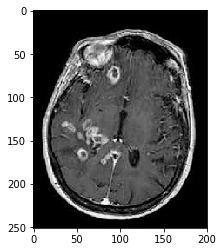

In [254]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2


imagecv2 = cv2.imread("brain/1/Y78.jpg")
plt.imshow(imagecv2)
#image.show()



In [255]:
model = tf.keras.models.load_model('model/')

In [256]:
image.save('new_image.png')
new_image = image.resize((224, 224))
new_image.save('image-size.png')

In [257]:
print(model.summary())
#print(model.accur)
print("=-=--=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-")

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
dropout_140 (Dropout)        (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
dropout_141 (Dropout)        (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 20736)           

[1]
[[0.05039075 0.9496093 ]]


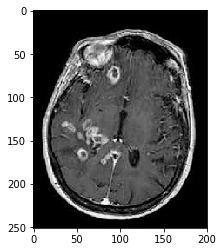

In [258]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import img_to_array, load_img

x = img_to_array(new_image)
x = np.expand_dims(x, axis=0)
preds = model.predict_classes(x)
prob = model.predict(x)

print(preds)
print(prob)

#if 1 in preds:
  #  print("You have a tumor",prob.max()*100,"%") 
#else:
   # print("You dont have a tumer", prob.max()*100,"%")
#print(preds, prob.max())
plt.imshow(imagecv2)
